<h1 style="color: red"> Gradient Descent In Linear Regration</h1>

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

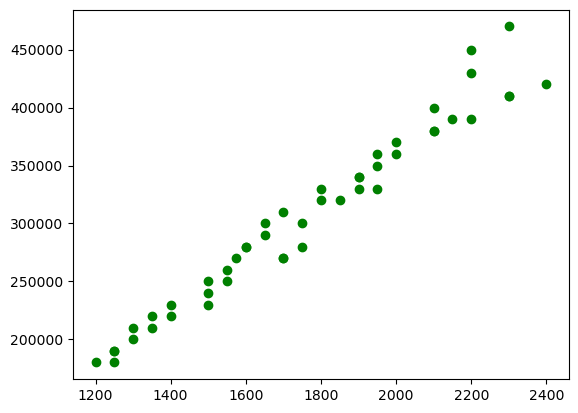

In [58]:
# # Load our data set
# x_train = np.array([200, 300, 400, 500])   #features
# y_train = np.array([2000, 3000, 4500, 5000])   #target value

df = pd.read_csv("house_prices.csv")

x_train = df['Area']
y_train = df['Price']
plt.scatter(x_train, y_train, color="green")

In [59]:
def gradient_descent(x, y, m_curr, b_curr, alpha, num_iterations):
    # scaling the x values to ranges btw [0-1] to handel larget numbers
    x_max = x.max()
    x = x/x_max
    
    # Getting the number of data points
    n = len(x)
    costs = []
    
    for i in range(num_iterations):
        # Predicting y values using the current slope and y-intercept
        y_predict = m_curr * x + b_curr
        
        # Calculating the cost for the current predictions
        cost = (1 / (2 * n)) * np.sum([(y_predict - y) ** 2])
        
        # Calculating the partial derivatives of the cost function with respect to m and b
        dm = (1 / n) * sum(x * (y_predict - y))
        db = (1 / n) * sum(y_predict - y)
        
        # Updating the slope and y-intercept using gradient descent
        m_curr = m_curr - alpha * dm
        b_curr = b_curr - alpha * db
        
        costs.append(cost)
        
    # Rescale m_curr to the original scale
    m_curr = m_curr / x_max
        
    return (m_curr, b_curr, costs)

In [60]:
m, b, costs = gradient_descent(x_train, y_train, 0, 0, 0.08, 10000)
m, b

(228.60578695918304, -95956.9140317766)

In [47]:
def predict(x, m, b):
    return m*x+b

In [55]:
predict(1600, m, b)

269812.34510291624

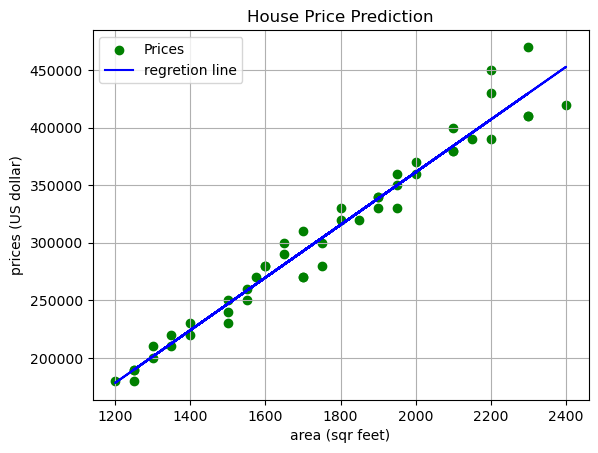

In [56]:
# Now making our graph more enhanced by using labels
y_predict = m * x_train + b

plt.xlabel("area (sqr feet)")
plt.ylabel("prices (US dollar)")
plt.title("House Price Prediction")
plt.scatter(x_train, y_train, color="green", label="Prices")
plt.plot(x_train, y_predict, color="blue", label="regretion line")
plt.legend()
plt.grid()

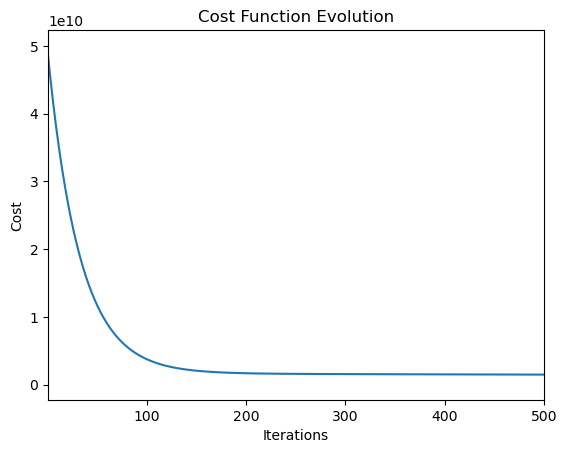

In [51]:
# Now let's see how our we get the coverage cost:
# Plotting the cost over iterations
plt.xlim(1, 500)
plt.plot(range(10000), costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Evolution")
plt.show()

In [54]:
# Now finding our R Squared to see the goodness of our eqn
SSR = np.sum((y_predict - y_train)**2)
SST = np.sum((y_train - y_train.mean())**2)
Rsqr = 1 - (SSR / SST)
Rsqr # Range: [1-0]

0.9190653359746996